In [16]:
%%html
<marquee style='width: 50%; color: GOLD;'><b> K MEANS ALGORITHM </b></marquee>
<marquee style='width: 70%; color: RED;'><b>K MEANS ALGORITHM </b></marquee>
<marquee style='width: 90%; color: BLUE;'><b>K MEANS ALGORITHM  </b></marquee>
<marquee style='width: 100%; color: green;'><b>K MEANS ALGORITHM  </b></marquee>

In [ ]:
import numpy as np #Algebra
import pandas as pd # Spreadsheets
import seaborn as sns #Visualization
import matplotlib.pyplot as plt#visalization 
import sklearn #scientific kit 
from sklearn.cluster import KMeans # k means algorithm
sns.set(style="darkgrid")

In [18]:
# Importing dataset for analysis
df = pd.read_csv('/content/HR_Analytics.csv')
# Let's describe the data to get a summary statistics of the dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [19]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


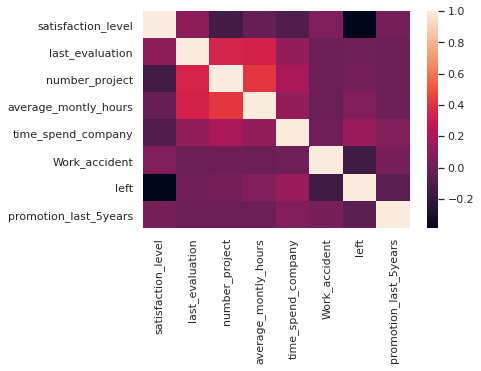

In [20]:
# Let's see what variables (independent) affect our dependent variable(Resigned)
# Let's see the correlation of the variables on the Resigned variable
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
# From the below heatmap we can notice two observations
# 1) There is a positive correlation between projectCount,evaluation and average_monthly_hours. Therefore, 
# those who worked on more number of projects and worked for more hours got good evaluations
# 2) There is a negative correlation between satisfaction and Resigned. Therefore, we can say that people
# who were less satisfied were more prone to resign! 

In [21]:
X = df.iloc[:,[0,1]].values

In [22]:
#Applying k-means to the dataset
kmeans = KMeans(n_clusters = 4,init ='k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

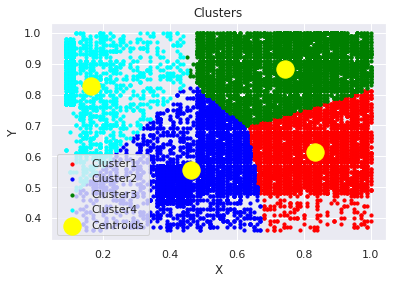

In [23]:
#Visualizing the clusters
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 10, c ='red',label = 'Cluster1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 10, c ='blue',label = 'Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 10, c ='green',label = 'Cluster3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s = 10, c ='cyan',label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c ='Yellow',label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')	
plt.ylabel('Y')
plt.legend()
plt.show()

In [26]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

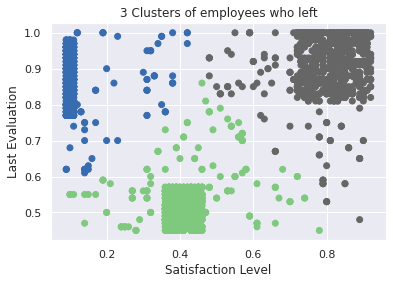

In [27]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()